In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, datetime


In [105]:
#df_cases = pd.read_csv('../../data/external/pandemic/owid-covid-data_US.csv', parse_dates=['date'])
#df_cases_USA = df_cases.query('iso_code == "USA"')
#df_cases_USA = df_cases_USA[['date', 'new_cases', 'new_cases_smoothed']]
#df_cases_USA = df_cases_USA[df_cases_USA['date'] <= datetime.fromisoformat('2022-02-03')]
#df_cases_USA.tail()

In [106]:
#df_cases.tail()

In [107]:
df_trends = pd.read_csv('../construct_network/data/processed/gt_rsvs.csv', parse_dates=['date'])
df_trends.tail()
start_date = pd.to_datetime('2020-04-15')
end_date = pd.to_datetime('2021-03-16')
df_filtered = df_trends[(df_trends['date'] >= start_date) & (df_trends['date'] <= end_date)]
df_filtered.iloc[:, 1:] = df_filtered.iloc[:, 1:].clip(upper=100)

In [108]:
tags = [
    "/m/01cpyy", # Coronavirus (Virus)
    "/m/01b_06", # Symptom (Topic)
    "/m/07kfjfg", # Airborne transmission (Disease)
    
    "/m/0dsdr32", # Travel warning (Topic)
    "/m/05zdp", # Public transport (Transit service type)
    "/m/012sj0", # Hygiene (Topic)

    "/m/07__7", # Vaccine (Topic)
    "/m/0dxh1", # Emergency medical services (Medical specialty)
    "/m/0119h9rd", # Rapid diagnostic test (Topic)
]
labels = [
    "cough",
    "ecq",
    "face-shield",
    
    "fever",
    "flu",
    "Frontliners",
    
    "headache",
    "lagnat",
    "masks",
    "Quarantine",
    "rashes",
    "sipon",
    "social-distancing",
    "work-from-home"
]

In [109]:
waves = [
    ("2020-04-15", "2020-05-15", "ECQ", "tab:blue"),
    ("2020-08-04", "2020-08-18", "MECQ", "yellow"),
]

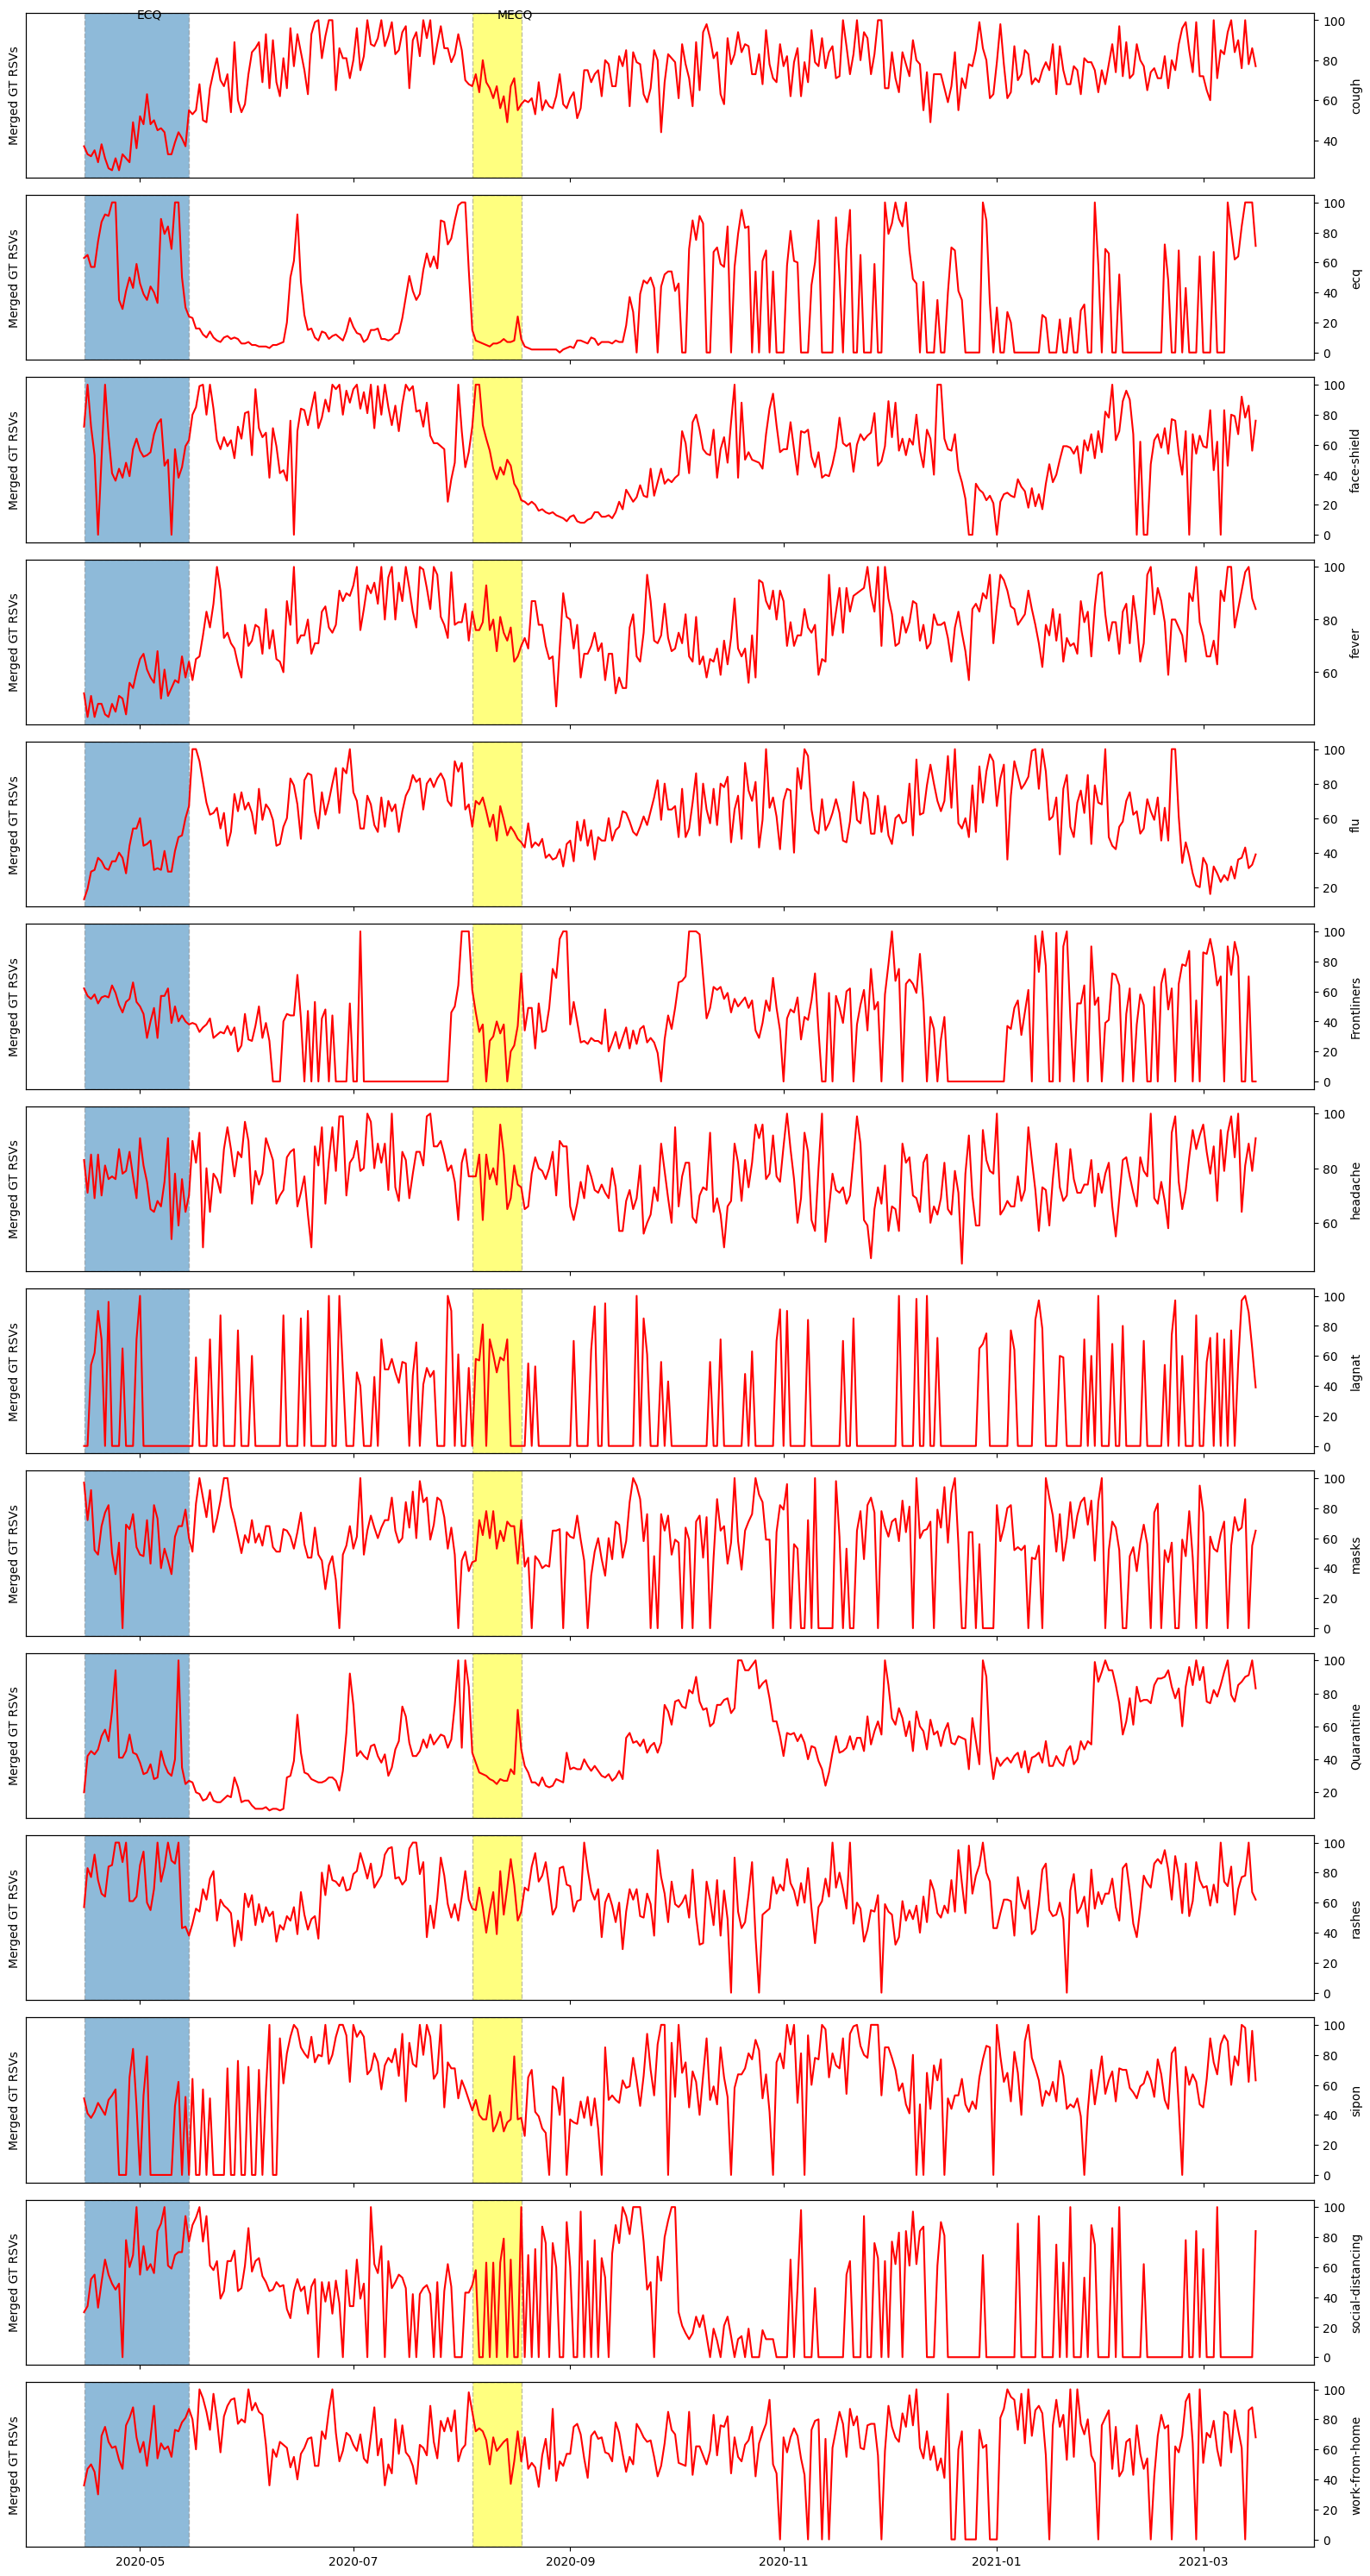

In [110]:
fig, axes = plt.subplots(nrows=14, sharex='all', figsize=(16, 30))

for index in range(14):
    current_column = labels[index]
    current_column = current_column.replace("/", ".")
    current_label = labels[index]

    ax2 = axes[index].twinx()
    
    axes[index].set_ylabel('Merged GT RSVs')
    
    # Hide y-axis ticks and labels for the main axes
    axes[index].yaxis.set_ticks([])
    axes[index].yaxis.set_ticklabels([])


    sns.lineplot(data=df_filtered, x='date', y=current_column, ax=ax2, color="r")


    for wave in waves:
        (wave_start, wave_end, label, color) = wave

        wave_start = date.fromisoformat(wave_start)
        wave_end = date.fromisoformat(wave_end)

        axes[index].axvspan(
            xmin=wave_start, xmax=wave_end, 
            edgecolor="grey", linestyle="--", facecolor=color, alpha=0.5
        )

        if index == 0:
            adj_x = wave_start + ((wave_end - wave_start) / 2)
            adj_y = df_trends.iloc[:, 1].max()

            # Annotation code is commented out, kept for reference
            ax2.annotate(
                 "" * 3 + label, rotation=0,
                 xy=(adj_x, adj_y),
                 xycoords='data',
                 horizontalalignment='left', verticalalignment='bottom'
            )

# Adjust layout to prevent overlapping
plt.tight_layout()


plt.savefig('../../graphs/RSVMerged-GT.Selected14.pdf', bbox_inches='tight')
plt.savefig('../../graphs/RSVMerged-GT.Selected14.png', bbox_inches='tight')
plt.show()